# Prova Final - Machine Learning

**Nome do aluno**: <font color='red'>Escreva seu nome aqui</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta. Faça o seu trabalho de maneira ética! Se você recebeu ajuda de sistemas de apoio inteligentes (por exemplo, ChatGPT, Bard, CoPilot, etc) DECLARE CLARAMENTE ONDE VOCÊ RECEBEU AJUDA para não configurar plágio (definido como "declarar como próprio o trabalho construido por outrem - neste caso um sistema computacional")

## Contexto do problema

No distante mundo do século XX, visão computacional era uma área de pesquisa feita de pedras, pauzinhos, pele de animais selvagens e muita *feature engineering* manual. Mas mesmo nos dias de hoje, com carros voadores e muito *deep learning*, ainda vemos exemplos de visão computacional feita de extração de características visuais com técnicas clássicas, combinadas com *machine learning* clássico.

Vamos trabalhar com um *dataset* de *features* obtidas de imagens de grãos de cereais. Abaixo temos a descrição do *dataset*. Sua tarefa é construir um modelo de classificação para este dataset.

```
Data Set Name:
Dry Bean Dataset

Abstract:
Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Source:
Murat KOKLU
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-2737-2360
mkoklu@selcuk.edu.tr

Ilker Ali OZKAN
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-5715-1040
ilkerozkan@selcuk.edu.tr

Data Type:
Multivariate

Task:
Classification

Attribute Type:
Categorical
Integer
Real

Area:
CS / Engineering

Format Type:
Matrix

Does your data set contain missing values?
No

Number of Instances (records in your data set): 
13611

Number of Attributes (fields within each record): 
17

Relevant Information:
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)



Relevant Papers:
KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

Citation Requests / Acknowledgements:
KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507```


In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('data.csv')
data = data.sample(frac=1, random_state=42)

X = data.drop('Class', axis=1).copy()
y = data['Class'].copy()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
classes = label_encoder.classes_
classes

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [4]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area,10888.0,52998.403564,29433.224065,20420.000000,36214.500000,44515.000000,61231.250000,254616.000000
Perimeter,10888.0,854.597454,214.845871,524.736000,702.730750,793.189000,975.534250,1985.370000
MajorAxisLength,10888.0,319.789523,85.810537,183.601165,252.941499,296.190846,375.851568,738.860153
MinorAxisLength,10888.0,202.214811,45.209111,122.512653,175.361000,192.273789,217.172760,460.198497
AspectRation,10888.0,1.582099,0.246278,1.024868,1.430522,1.549713,1.704335,2.388873
Eccentricity,10888.0,0.750481,0.092242,0.218951,0.715077,0.763946,0.809776,0.908167
ConvexArea,10888.0,53718.726488,29887.658903,20684.000000,36611.500000,45036.500000,62167.500000,263261.000000
EquivDiameter,10888.0,252.891194,59.380391,161.243764,214.731771,238.071960,279.216848,569.374358
Extent,10888.0,0.749882,0.048997,0.555315,0.718759,0.759924,0.786866,0.858420
Solidity,10888.0,0.987127,0.004729,0.919246,0.985710,0.988300,0.990008,0.994677


In [5]:
data['Class'].value_counts(normalize=True)

Class
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: proportion, dtype: float64

**Questão 1** (1,0 pt.): Qual o valor da acurácia do modelo de referência (dummy classifier)?

**Resposta mínima**: $26.1\%$, que é a freqûencia normalizada da classe mais frequente.

**Resposta longa**: Um classificador *dummy* é aquele que simplesmente retorna como predição a classe mais frequente do dataset, sem nem ao menos considerar as *features* do item para o qual estamos realizando a predição.

Observando as frequências normalizadas de classe acima, vemos que a classe mais frequente é ``DERMASON``, que seria então a resposta do classificador *dummy* sempre.

Ao prover essa resposta constante, e pelas frequências normalizadas acima, vemos que o classificador *dummy* estaria correto $26.1\%$ das vezes, que é portanto a acurácia estimada deste modelo.

**Resposta com ChatGPT**: 

Numa primeira tentativa, vamos usar o enunciado como query:

*Query*: o enunciado.

*Resposta*: 

"O valor da acurácia de um modelo de referência (dummy classifier) depende da estratégia utilizada para fazer as previsões e da distribuição das classes no conjunto de dados. Vamos examinar algumas das estratégias comuns e como calcularíamos a acurácia para cada uma delas:

1. **Estratégia "most_frequent"**: o modelo sempre prevê a classe mais frequente no conjunto de dados de treinamento.
   - Se a classe A representa 70% dos dados e a classe B 30%, a acurácia do dummy classifier seria 70%, pois ele sempre vai prever a classe A.

2. **Estratégia "stratified"**: o modelo prevê as classes de acordo com a distribuição das classes no conjunto de dados de treinamento.
   - Se a classe A representa 70% dos dados e a classe B 30%, a acurácia do dummy classifier deve refletir a proporção esperada pela aleatoriedade estratificada. Na prática, a acurácia exata pode variar dependendo do conjunto de teste, mas em média deve ser próxima de 70%.

3. **Estratégia "uniform"**: o modelo prevê as classes uniformemente (aleatoriamente entre todas as classes).
   - Se houver duas classes, A e B, a acurácia esperada seria 50%, pois o modelo tem a mesma chance de prever qualquer uma das classes.

4. **Estratégia "constant"**: o modelo sempre prevê uma classe específica, independente da distribuição dos dados.
   - A acurácia depende de qual classe é escolhida e qual é a distribuição real das classes no conjunto de dados. Se a classe escolhida representa 40% dos dados, a acurácia seria 40%.

Exemplo de cálculo:
- Suponha que temos um conjunto de dados com 100 amostras onde 80 são da classe A e 20 da classe B.
- Utilizando a estratégia "most_frequent":
  - O modelo sempre prevê a classe A.
  - Acurácia = (número de previsões corretas) / (número total de amostras) = 80 / 100 = 80%.

Portanto, para saber o valor específico da acurácia do modelo de referência no seu caso, seria necessário saber a estratégia utilizada e a distribuição das classes no conjunto de dados específico."

Note que essa resposta é totalmente genérica, não responde a questão da prova (não receberia nenhum ponto). Faltou prover o contexto para o ChatGPT, que é a tabela de frequências. Vamos tentar de novo:

*Query*:

Dado a seguinte tabela de frequências de classe:

```
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
```

responda a seguinte pergunta: Qual o valor da acurácia do modelo de referência (dummy classifier)?

*Resposta*:

"Para calcular a acurácia de um modelo de referência (dummy classifier) que faz previsões baseadas na classe mais frequente, primeiro identificamos qual é a classe mais frequente na tabela de frequências fornecida. 

Aqui está a tabela de frequências de classe fornecida:

| Classe   | Frequência  |
|----------|-------------|
| DERMASON | 0.260525    |
| SIRA     | 0.193667    |
| SEKER    | 0.148924    |
| HOROZ    | 0.141650    |
| CALI     | 0.119756    |
| BARBUNYA | 0.097127    |
| BOMBAY   | 0.038351    |

A classe com a maior frequência é **DERMASON** com uma frequência de 0.260525 (26.05%).

Um modelo de referência (dummy classifier) que sempre prevê a classe mais frequente teria uma acurácia igual à frequência dessa classe mais frequente. Portanto, a acurácia do modelo de referência é:

$ \text{Acurácia} = 0.260525 $

Então, o valor da acurácia do modelo de referência (dummy classifier) é **0.260525** ou **26.05%**."

Agora sim a resposta está correta. Para ter pontos plenos nesta questão, não copie *verbatim* a resposta: escreva com suas palavras, e também cite a fonte por completo: fale que perguntou para o chatgpt, inclua a *query* e a resposta.

**Questão 2** (1,0 pt.): Quando utilizamos o KMeans, LinearSVC, PCA, etc, qual a transformação de dados que precisamos fazer antes de utilizá-los? Por que?

**Resposta mínima**: Temos que usar o ``StandardScaler`` para que todas as *features* tenham a mesma ordem de grandeza.

**Resposta longa**: Estes modelos são baseados em comparação de distâncias no espaço das *features*:

- KMeans usa distância entre o centróide de cada classe e as várias amostras do *dataset* para determinar quais amostras pertencem a qual cluster.

- *Support Vector Machines* usam a distância entre os pontos e a linha de separação de classes (função de decisão) como critério da qualidade do classificador, e busca maximizar essa distância.

- PCA: Otimiza o erro de reconstrução entre as projeções dos pontos de dados nas direções principais e os dados originais. Este erro é uma distância quadrática.

Sempre que temos o uso de distâncias em um método de *machine learning* é importante que as *features* tenham valores comparáveis em ordem de grandeza: se uma *feature* tem valores numéricos de ordem de grandeza muito superior às demais ela será o único fator impactante do cálculo de distância, e consequentemente fará com que as demais *features* sejam desprezadas no método, efetivamente reduzindo a informação utilizada.

Portando, ao usar métodos que dependem de cálculo de distância, precisamos normalizar os dados. O scikit-learn tem um transformador para essa tarefa: o `StandardScaler`

**Resposta com ChatGPT**:

*Query*: o enunciado da questão

*Resposta*:

"Antes de utilizar algoritmos como KMeans, LinearSVC, e PCA, é importante realizar certas transformações nos dados. Essas transformações são essenciais para garantir que os algoritmos funcionem de maneira eficiente e forneçam resultados precisos. Aqui estão algumas das principais transformações e o motivo de cada uma:

1. **Normalização/Escalonamento dos Dados:**
   - **KMeans:** KMeans é um algoritmo de clustering que calcula distâncias entre pontos e centroids. Se os dados não forem normalizados, as features com valores maiores terão mais influência no cálculo da distância, distorcendo os resultados do clustering. Normalizar os dados (por exemplo, usando Min-Max Scaling ou Standard Scaling) garante que todas as features contribuam de forma equilibrada para a distância.
   - **LinearSVC:** LinearSVC é uma variante do SVM (Support Vector Machine) que busca maximizar a margem entre classes. A escala das features pode influenciar a orientação do hiperplano de decisão. Portanto, normalizar os dados garante que todas as features contribuam igualmente para a determinação do hiperplano de decisão.
   - **PCA:** PCA (Principal Component Analysis) é uma técnica de redução de dimensionalidade que projeta os dados em uma nova base de componentes principais. Se as features estiverem em diferentes escalas, as componentes principais serão influenciadas desproporcionalmente pelas features de maior escala. Normalizar os dados antes de aplicar PCA assegura que todas as features influenciem igualmente a formação dos componentes principais.

2. **Tratamento de Valores Ausentes:**
   - Muitos algoritmos, incluindo KMeans, LinearSVC, e PCA, não lidam bem com valores ausentes. É importante lidar com esses valores antes de aplicar os algoritmos. Estratégias comuns incluem imputação (por exemplo, substituição por média, mediana, ou moda) ou remoção de amostras/informações incompletas.

3. **Codificação de Variáveis Categóricas:**
   - **KMeans, LinearSVC, PCA:** Esses algoritmos geralmente requerem que os dados sejam numéricos. Se houver variáveis categóricas, elas precisam ser convertidas para uma forma numérica. Técnicas comuns incluem One-Hot Encoding ou Label Encoding.

### Resumo das Transformações:

- **Normalização/Escalonamento:** Usar `StandardScaler` ou `MinMaxScaler` da biblioteca `sklearn` para normalizar os dados.
- **Tratamento de Valores Ausentes:** Utilizar `SimpleImputer` ou outras técnicas de imputação.
- **Codificação de Variáveis Categóricas:** Utilizar `OneHotEncoder` ou `LabelEncoder` para transformar variáveis categóricas em numéricas.

### Implementação Prática com `scikit-learn`:

```python
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

# Exemplo de pipeline para pré-processamento e modelagem
numeric_features = ['feature1', 'feature2']  # substitua pelos nomes das suas features numéricas
categorical_features = ['feature3', 'feature4']  # substitua pelos nomes das suas features categóricas

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Exemplo de pipeline completa com KMeans
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clusterer', KMeans(n_clusters=3))])

# Ajustar e prever com a pipeline
# kmeans_pipeline.fit(X_train)
# labels = kmeans_pipeline.predict(X_test)

# Similarmente, pode-se criar pipelines para LinearSVC e PCA
```

Aplicar essas transformações assegura que os algoritmos funcionem de maneira ótima e proporcionem resultados mais confiáveis e interpretáveis."

Note que essa resposta é excessiva: fala de outros preprocessamentos que, embora necessários em geral, não são específicos dos métodos exemplificados. Portanto, basta cortar essa parte da resposta. A resposta final fica sendo:

"Antes de utilizar algoritmos como KMeans, LinearSVC, e PCA, é importante realizar a normalização/escalonamento dos dados:

   - **KMeans:** KMeans é um algoritmo de clustering que calcula distâncias entre pontos e centroids. Se os dados não forem normalizados, as features com valores maiores terão mais influência no cálculo da distância, distorcendo os resultados do clustering. Normalizar os dados (por exemplo, usando Min-Max Scaling ou Standard Scaling) garante que todas as features contribuam de forma equilibrada para a distância.
   - **LinearSVC:** LinearSVC é uma variante do SVM (Support Vector Machine) que busca maximizar a margem entre classes. A escala das features pode influenciar a orientação do hiperplano de decisão. Portanto, normalizar os dados garante que todas as features contribuam igualmente para a determinação do hiperplano de decisão.
   - **PCA:** PCA (Principal Component Analysis) é uma técnica de redução de dimensionalidade que projeta os dados em uma nova base de componentes principais. Se as features estiverem em diferentes escalas, as componentes principais serão influenciadas desproporcionalmente pelas features de maior escala. Normalizar os dados antes de aplicar PCA assegura que todas as features influenciem igualmente a formação dos componentes principais.

O componente do scikit-learn que realiza essa operação é o `StandardScaler`.

**Questão 3** (1,5 pts.): Faça uma pipeline que recebe um dataset `X_train` e retorna um `array` com os valores das duas principais componentes de X para cada amostra. Mostre um *scatter plot* destas componentes, onde a cor é `y_train`.

**ATENÇÃO**: ver questão 2!

**Resposta mínima**:

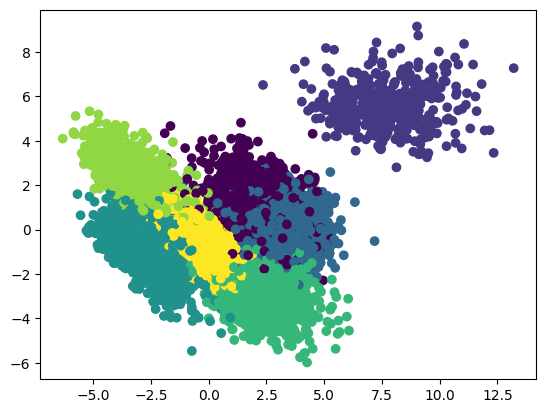

In [6]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Constroi a pipeline.
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
])

# Ajusta e transforma os dados.
pca_components = pipe.fit_transform(X_train)

# Plota os dados.
plt.figure()
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y_train)
plt.show()

**Resposta longa**: Apenas melhorei a qualidade do gráfico, nada de mais.

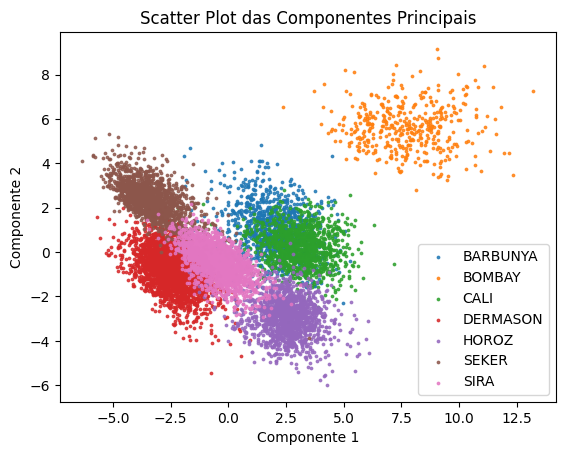

In [7]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Constroi a pipeline.
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
])

# Ajusta e transforma os dados.
pca_components = pipe.fit_transform(X_train)

# Plota os dados.
cmap = plt.get_cmap('tab10')

plt.figure()
for i in range(len(classes)):
    plt.scatter(
        pca_components[y_train == i, 0],
        pca_components[y_train == i, 1],
        color=cmap(i),
        label=classes[i],
        alpha=0.8,
        s=3,
    )
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Scatter Plot das Componentes Principais')
plt.legend()
plt.show()

**Resposta com ChatGPT**:

Ok, vamos usar o ChatGPT para gerar nossa resposta:

*Query*: "Faça uma pipeline que recebe um dataset `X_train` e retorna um `array` com os valores das duas principais componentes de X para cada amostra. Mostre um *scatter plot* destas componentes, onde a cor é `y_train`"

*Resposta*:

"Claro! Você pode usar a biblioteca `scikit-learn` para fazer a redução de dimensionalidade usando o método Principal Component Analysis (PCA) e a biblioteca `matplotlib` para plotar o scatter plot. Aqui está um exemplo de como você pode fazer isso:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def get_principal_components(X_train, y_train):
    # Inicializa o objeto PCA com 2 componentes
    pca = PCA(n_components=2)
    # Aplica o PCA aos dados de treinamento
    X_train_pca = pca.fit_transform(X_train)
    return X_train_pca

def plot_scatter_with_color(X_train_pca, y_train):
    # Plota o scatter plot das duas principais componentes
    plt.figure(figsize=(8, 6))
    # Itera sobre as classes únicas em y_train
    for label in np.unique(y_train):
        # Seleciona os pontos correspondentes a esta classe
        plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter Plot das Duas Principais Componentes com Cores de y_train')
    plt.legend()
    plt.show()

# Exemplo de uso
# Supondo que você tenha X_train e y_train

# Obtém as duas principais componentes
X_train_pca = get_principal_components(X_train, y_train)

# Plota o scatter plot com as cores de y_train
plot_scatter_with_color(X_train_pca, y_train)
```

Certifique-se de substituir `X_train` e `y_train` pelos seus próprios conjuntos de dados. Esta pipeline primeiro usa PCA para reduzir a dimensionalidade do conjunto de dados para duas dimensões e, em seguida, plota o scatter plot dessas duas dimensões, colorindo os pontos de acordo com os rótulos em `y_train`."

Legal, vamos rodar isso e ver o que dá:

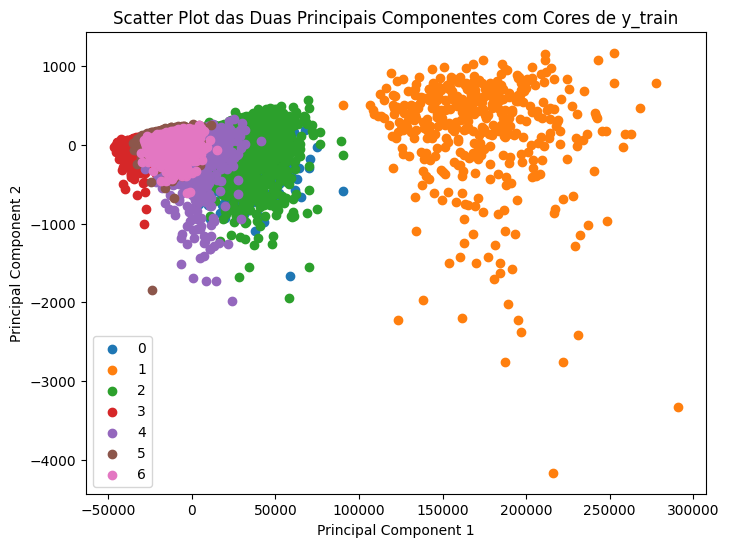

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def get_principal_components(X_train, y_train):
    # Inicializa o objeto PCA com 2 componentes
    pca = PCA(n_components=2)
    # Aplica o PCA aos dados de treinamento
    X_train_pca = pca.fit_transform(X_train)
    return X_train_pca

def plot_scatter_with_color(X_train_pca, y_train):
    # Plota o scatter plot das duas principais componentes
    plt.figure(figsize=(8, 6))
    # Itera sobre as classes únicas em y_train
    for label in np.unique(y_train):
        # Seleciona os pontos correspondentes a esta classe
        plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter Plot das Duas Principais Componentes com Cores de y_train')
    plt.legend()
    plt.show()

# Exemplo de uso
# Supondo que você tenha X_train e y_train

# Obtém as duas principais componentes
X_train_pca = get_principal_components(X_train, y_train)

# Plota o scatter plot com as cores de y_train
plot_scatter_with_color(X_train_pca, y_train)


Deu muito estranho. Revendo o código, você percebe que faltou um `StandardScaler`. Vamos pedir para o ChatGPT corrigir isso:

*Query*: Adicione um StandardScaler

*Resposta*: 

"Claro! Adicionar um StandardScaler à pipeline é uma boa prática para garantir que todas as features tenham a mesma escala antes de aplicar o PCA. Aqui está a modificação do código anterior para incluir o StandardScaler:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def get_principal_components(X_train, y_train):
    # Inicializa o StandardScaler
    scaler = StandardScaler()
    # Padroniza os dados de treinamento
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Inicializa o objeto PCA com 2 componentes
    pca = PCA(n_components=2)
    # Aplica o PCA aos dados de treinamento padronizados
    X_train_pca = pca.fit_transform(X_train_scaled)
    return X_train_pca

def plot_scatter_with_color(X_train_pca, y_train):
    # Plota o scatter plot das duas principais componentes
    plt.figure(figsize=(8, 6))
    # Itera sobre as classes únicas em y_train
    for label in np.unique(y_train):
        # Seleciona os pontos correspondentes a esta classe
        plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter Plot das Duas Principais Componentes com Cores de y_train')
    plt.legend()
    plt.show()

# Exemplo de uso
# Supondo que você tenha X_train e y_train

# Obtém as duas principais componentes
X_train_pca = get_principal_components(X_train, y_train)

# Plota o scatter plot com as cores de y_train
plot_scatter_with_color(X_train_pca, y_train)
```

Aqui, o `StandardScaler` é utilizado para padronizar as features antes de aplicar o PCA, garantindo que todas as features tenham média zero e variância unitária, o que é uma premissa do PCA."

Vamos tentar esse código:

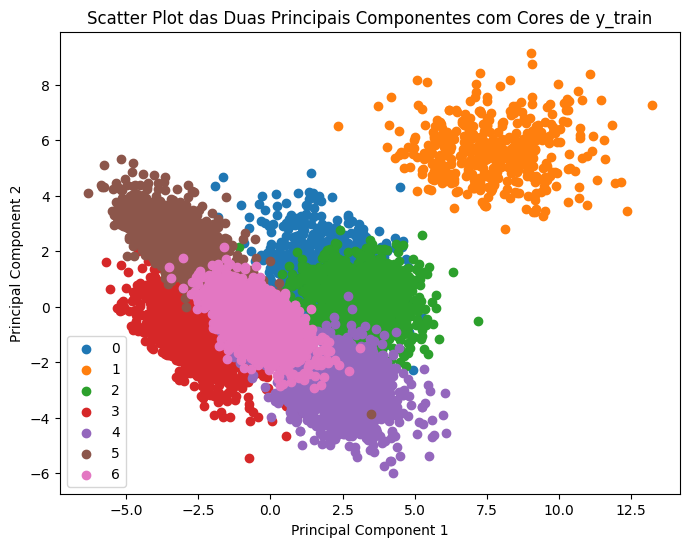

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def get_principal_components(X_train, y_train):
    # Inicializa o StandardScaler
    scaler = StandardScaler()
    # Padroniza os dados de treinamento
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Inicializa o objeto PCA com 2 componentes
    pca = PCA(n_components=2)
    # Aplica o PCA aos dados de treinamento padronizados
    X_train_pca = pca.fit_transform(X_train_scaled)
    return X_train_pca

def plot_scatter_with_color(X_train_pca, y_train):
    # Plota o scatter plot das duas principais componentes
    plt.figure(figsize=(8, 6))
    # Itera sobre as classes únicas em y_train
    for label in np.unique(y_train):
        # Seleciona os pontos correspondentes a esta classe
        plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter Plot das Duas Principais Componentes com Cores de y_train')
    plt.legend()
    plt.show()

# Exemplo de uso
# Supondo que você tenha X_train e y_train

# Obtém as duas principais componentes
X_train_pca = get_principal_components(X_train, y_train)

# Plota o scatter plot com as cores de y_train
plot_scatter_with_color(X_train_pca, y_train)


Muito melhor! Mas eu queria que o código de preprocessamento dos dados fosse uma `Pipeline` do scikit-learn. Vamos pedir isso para o ChatGPT:

*Query*: Use uma Pipeline do scikit-learn

*Resposta*: 

"Claro! Você pode encapsular as etapas de pré-processamento (padronização) e redução de dimensionalidade (PCA) em uma única `Pipeline` do scikit-learn. Aqui está como fazer isso:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def plot_scatter_with_color(X_train_pca, y_train):
    # Plota o scatter plot das duas principais componentes
    plt.figure(figsize=(8, 6))
    # Itera sobre as classes únicas em y_train
    for label in np.unique(y_train):
        # Seleciona os pontos correspondentes a esta classe
        plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter Plot das Duas Principais Componentes com Cores de y_train')
    plt.legend()
    plt.show()

# Criando a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Padronização
    ('pca', PCA(n_components=2))   # PCA com 2 componentes
])

# Exemplo de uso
# Supondo que você tenha X_train e y_train

# Aplica a Pipeline
X_train_pca = pipeline.fit_transform(X_train, y_train)

# Plota o scatter plot com as cores de y_train
plot_scatter_with_color(X_train_pca, y_train)
```

Esta abordagem encapsula as etapas de padronização e redução de dimensionalidade em uma única `Pipeline`, que pode ser aplicada facilmente a qualquer conjunto de dados de treinamento. Isso torna o código mais conciso e mais fácil de entender."

Agora vamos testar o código final:

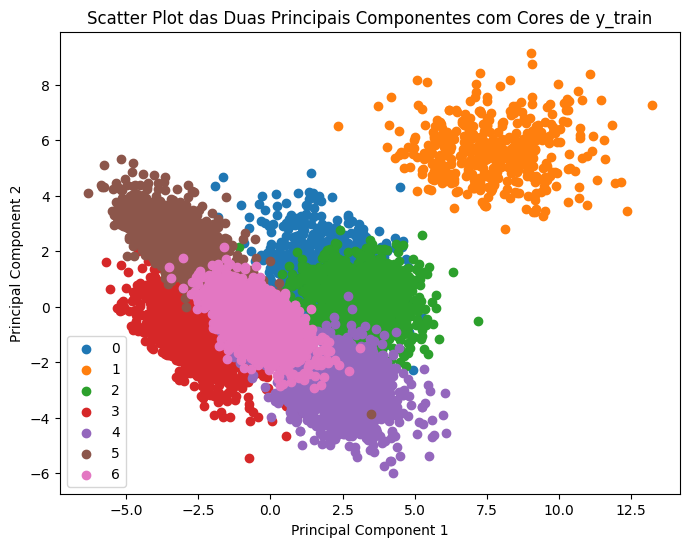

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def plot_scatter_with_color(X_train_pca, y_train):
    # Plota o scatter plot das duas principais componentes
    plt.figure(figsize=(8, 6))
    # Itera sobre as classes únicas em y_train
    for label in np.unique(y_train):
        # Seleciona os pontos correspondentes a esta classe
        plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Scatter Plot das Duas Principais Componentes com Cores de y_train')
    plt.legend()
    plt.show()

# Criando a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Padronização
    ('pca', PCA(n_components=2))   # PCA com 2 componentes
])

# Exemplo de uso
# Supondo que você tenha X_train e y_train

# Aplica a Pipeline
X_train_pca = pipeline.fit_transform(X_train, y_train)

# Plota o scatter plot com as cores de y_train
plot_scatter_with_color(X_train_pca, y_train)

Perfeito, chegamos na resposta! Ainda prefiro a minha, está melhor organizada, mas essa está bem ok.

**Questão 4** (1,5 pt.): Faça uma pipeline que recebe um dataset `X` e usa `KMeans` para *clusterizar* o dataset em 7 clusters, ou seja, obter a alocação de cluster para cada amostra de entrada.

**ATENÇÃO**: ver questão 2!

**Resposta mínima**:

In [11]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clustering_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=7, random_state=42)),
])

clustering_pipeline.fit(X_train)
clusters = clustering_pipeline.predict(X_train)

In [12]:
clusters

array([6, 0, 6, ..., 3, 6, 4], dtype=int32)

**Resposta longa**: não tem, é só aquilo mesmo

**Resposta com ChatGPT**:

Já vamos montar a *query* com o pedido de `Pipeline` e `StandardScaler`:

*Query*: 

Faça uma pipeline que recebe um dataset `X` e usa `KMeans` para *clusterizar* o dataset em 7 clusters, ou seja, obter a alocação de cluster para cada amostra de entrada. Use Pipeline e StandardScaler do scikit-learn

*Resposta*:

"Para criar uma pipeline que recebe um dataset `X` e utiliza `KMeans` para clusterizar o dataset em 7 clusters, podemos utilizar as classes `Pipeline` e `StandardScaler` do scikit-learn. O `StandardScaler` é usado para padronizar os dados, e o `KMeans` para realizar a clusterização.

Aqui está um exemplo de como fazer isso:

1. **Importar as bibliotecas necessárias:**
2. **Criar e configurar a pipeline:**
3. **Ajustar a pipeline aos dados:**
4. **Obter as alocações dos clusters:**

Vamos ver o código em detalhes:

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Supondo que X é o seu dataset
# X = ...

# Passo 1: Definir os passos da pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Padronização dos dados
    ('kmeans', KMeans(n_clusters=7, random_state=42))  # Clusterização KMeans com 7 clusters
])

# Passo 2: Ajustar a pipeline aos dados
pipeline.fit(X)

# Passo 3: Obter as alocações dos clusters
clusters = pipeline['kmeans'].labels_

# clusters agora contém o índice do cluster para cada amostra em X
print(clusters)
```

### Explicação

1. **Importações:** Importamos `Pipeline`, `StandardScaler` e `KMeans` do scikit-learn.
2. **Definição da Pipeline:** Criamos uma pipeline que primeiro padroniza os dados com `StandardScaler` e depois aplica o `KMeans` para clusterizar os dados em 7 clusters.
3. **Ajuste da Pipeline:** Ajustamos a pipeline aos dados usando `pipeline.fit(X)`, onde `X` é o dataset de entrada.
4. **Obtenção dos Clusters:** Após o ajuste, usamos `pipeline['kmeans'].labels_` para obter os rótulos dos clusters atribuídos a cada amostra.

### Nota

- Certifique-se de que `X` seja um array numpy ou um DataFrame pandas contendo seus dados.
- O parâmetro `random_state` em `KMeans` é usado para garantir reprodutibilidade dos resultados.

Com esta pipeline, você pode facilmente pré-processar seus dados e aplicar a clusterização de maneira eficiente e organizada."

Vamos rodar esse código para ver se funciona. Temos que substituir `X` por `X_train`.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Supondo que X é o seu dataset
# X = ...

# Passo 1: Definir os passos da pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Padronização dos dados
    ('kmeans', KMeans(n_clusters=7, random_state=42))  # Clusterização KMeans com 7 clusters
])

# Passo 2: Ajustar a pipeline aos dados
pipeline.fit(X_train)

# Passo 3: Obter as alocações dos clusters
clusters = pipeline['kmeans'].labels_

# clusters agora contém o índice do cluster para cada amostra em X
print(clusters)


[6 0 6 ... 3 6 4]


Esta resposta está correta.

**Questão 5** (1,0 pt.): Use a pipeline da Questão 4 para criar uma nova coluna chamada `cluster` em `X_train` e `X_test`.

**Resposta mínima (e longa)**:

In [14]:
clusters_train = pipeline.predict(X_train)
X_train['cluster'] = clusters_train

clusters_test = pipeline.predict(X_test)
X_test['cluster'] = clusters_test

In [15]:
X_train.head().transpose()

,8785,1686,1709,1063,4738
Area,44793.000000,44459.000000,44652.000000,39430.000000,75389.000000
Perimeter,804.334000,758.560000,779.929000,755.532000,1081.439000
MajorAxisLength,306.717038,257.030418,292.067694,236.769524,423.120484
MinorAxisLength,186.537550,220.511271,195.067915,213.260046,231.357165
AspectRation,1.644264,1.165611,1.497262,1.110239,1.828863
Eccentricity,0.793803,0.513785,0.744264,0.434426,0.837271
ConvexArea,45254.000000,44768.000000,45012.000000,40085.000000,77225.000000
EquivDiameter,238.814193,237.922166,238.438026,224.062124,309.819715
Extent,0.698232,0.766534,0.789756,0.782807,0.761444
Solidity,0.989813,0.993098,0.992002,0.983660,0.976225


**Questão 6** (1,5 pts.): Construa uma pipeline que processa os dados pós-Questão 5 de acordo com a seguinte especificação:

- Para a nova feature `cluster` use OneHotEncoding;
- Para as features originais, use uma sub-pipeline com 2 etapas:
    - `PolynomialFeatures` de grau 2;
    - `StandardScaler`;

Dica: use `ColumnTransformer`.

Processe os dados de treino e teste


**Resposta**:

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (OneHotEncoder, PolynomialFeatures,
                                   StandardScaler)

numerical_features = X_train.columns.drop('cluster')
categorical_features = ['cluster']

numerical_pipeline = Pipeline([
    ('poly', PolynomialFeatures(2)),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features),
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

**Resposta com ChatGPT**:

Usando o enunciado como prompt, ele se perde um pouco mas se aproxima da resposta. Fica a seu cargo entender minha resposta acima e ver o que precisa ser adaptado da resposta do ChatGPT para que ela esteja correta.

*Query*: o enunciado

*Resposta*:

"Para construir uma pipeline que processe os dados pós-Questão 5 de acordo com as especificações fornecidas, utilizaremos `Pipeline` e `ColumnTransformer` do scikit-learn. Aqui está um exemplo completo de como fazer isso:

### Passo a Passo:

1. **Importação das bibliotecas necessárias**:
   - `Pipeline` e `ColumnTransformer` do scikit-learn para criar as pipelines de transformação.
   - `OneHotEncoder`, `PolynomialFeatures` e `StandardScaler` para as transformações necessárias.
   - `train_test_split` para dividir os dados em conjuntos de treino e teste.

2. **Definição da Pipeline**:
   - Criaremos uma pipeline para processar a nova feature `cluster` usando `OneHotEncoder`.
   - Para as features originais, utilizaremos uma sub-pipeline com `PolynomialFeatures` e `StandardScaler`.

3. **Transformação dos Dados**:
   - Aplicar a pipeline ao conjunto de dados de treino e teste.

### Código

Aqui está o código completo para essa tarefa:

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Exemplo de DataFrame, substitua isso pelo seu DataFrame real
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'cluster': ['A', 'B', 'A', 'B', 'A']
}

df = pd.DataFrame(data)

# Separar features e target, se houver um
X = df.drop(columns=[])
y = df['cluster']  # Supondo que 'cluster' não seja a target neste caso

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir as colunas para cada tipo de processamento
categorical_features = ['cluster']
original_features = ['feature1', 'feature2']

# Pipeline para a nova feature 'cluster' usando OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Sub-pipeline para as features originais usando PolynomialFeatures e StandardScaler
original_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])

# Combinar as transformações usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('orig', original_transformer, original_features)
    ]
)

# Aplicar a transformação nos dados de treino e teste
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Exibir os dados transformados
print("Dados de treino transformados:\n", X_train_processed)
print("Dados de teste transformados:\n", X_test_processed)
```

### Explicação:

1. **Importação e Preparação**: Importamos as bibliotecas necessárias e criamos um DataFrame de exemplo. Substitua esse DataFrame pelos seus dados reais.

2. **Divisão dos Dados**: Dividimos os dados em conjuntos de treino e teste usando `train_test_split`.

3. **Definição das Transformações**:
   - **Para a feature `cluster`**: Utilizamos `OneHotEncoder` dentro de uma pipeline.
   - **Para as features originais**: Criamos uma sub-pipeline com `PolynomialFeatures` (grau 2) e `StandardScaler`.

4. **ColumnTransformer**: Combina as duas pipelines, aplicando `OneHotEncoder` à coluna `cluster` e a sub-pipeline às features originais.

5. **Transformação**: Aplicamos a pipeline de pré-processamento aos dados de treino e teste, exibindo os dados transformados.

Este código fornece uma base sólida para transformar e preparar seus dados de acordo com as especificações fornecidas. Ajuste conforme necessário para os seus dados específicos."

**Questão 7** (1,0 pt.): Avalie o desempenho de um modelo `LinearSVC` com coeficiente de regularização `C=1e2` nestes dados processados

**Resposta**:

In [17]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

model = LinearSVC(C=1e2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.93      0.93       267
      BOMBAY       1.00      0.99      1.00       103
        CALI       0.93      0.94      0.94       330
    DERMASON       0.91      0.92      0.92       667
       HOROZ       0.96      0.95      0.96       395
       SEKER       0.97      0.96      0.97       404
        SIRA       0.88      0.89      0.89       557

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



Observando o gráfico de dispersão da PCA na questão 3 fica evidente que a classe `BOMBAY` é realmente mais distinta das demais classes. A classe `SIRA`, por exemplo, está bem misturada com as outras classes. Isto se reflete na melhor precisão e *recall* para a classe `BOMBAY` rem relação às demais.

A acurácia do classificador está bem acima do desempenho do classificador trivial. A diferença de desempenhos é tão grande que podemos afirmar, mesmo sem um teste de hipótese, que o classificador desta questão é superior ao classificador trivial.

**Questão 8** (1,5 pts.): Ao testar o desempenho do modelo `LinearSVC` variando o coeficiente de regularização eu obtive a seguinte curva:

![Curvas de treino e teste variando C](./train_test.png)

Este modelo está sobreajustado (overfitting) para valores altos de C? O que fazer quando um modelo está sobreajustado? Para onde vai o desempenho do modelo pós-correção de sobreajuste?

**Resposta**:

> Este modelo está sobreajustado (overfitting) para valores altos de C? 

Sim, está sobreajustado, pois vemos que o erro de validação (*test*) está muito diferente do erro de treinamento (*train*).

> O que fazer quando um modelo está sobreajustado?

Devemos aumentar o nível de regularização. Neste caso, podemos diminuir o valor de C.

> Para onde vai o desempenho do modelo pós-correção de sobreajuste?

O desempenho sobe para aproximadamente 0.93 para C=100, acima do desempenho de aproximadamente 0.927 com C=10000. Apesar de pequena, a diferença de desempenhos é importante: do ponto de vista do erro médio, caímos de 7.3% para 7%, um melhoramento de 4.3% em relação ao erro maior.